In [1]:
import pandas as pd

In [2]:
import numpy as np

In [1]:
class Perceptron():   
    #konstruktor
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10):    #nastavenie rychlosti ucenia a poctu iteracii, 
        self.eta = rychlost_ucenia                                  #tj. kolko krat proces ucenia zbehne 
        self.n_iter = pocet_iteracii      
    
    def fit(self, X,y):  
        self.vahy = np.zeros(1+ X.shape[1]) #invializacia vah
        self.errors_=[] #inicializacia matice errors_, ktora ukada chybovost NS
        
        for i in range(self.n_iter): #cyklus ucenia NS, vykona sa 10 krat
            errors = 0
            
            for matica,vystup in zip(X,y):  #cyklus ucenia, do X sa nacitavaju vstupne data do y vystupne, cysklus zbehne pre 
                                            #pre vsetky riadky datasetu * 10(pocet iteracii)=1000
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                errors += int(update !=0.0)
            self.errors_.append(errors)        
        return self  

    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]

    def predikcia(self, X):   #ak je vysledok z funkcie net_input >0, predikcia je 1, inak -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) #nacitanie datasetu
df.head()

X = df.iloc[:100,[0,2]].values #nacitanie prvych 100 hodnot z 1. a 3. stplca datasetu do matice 
y = df.iloc[:100,4].values #nacitanie hodnot 5. stpca datesetu do matice
y =np.where(y=='Iris-setosa',-1,1) #Ak sa 5. stlpec zhoduje s "Iris-setosa" tak -1, inak 1
ppn = Perceptron()  
ppn.fit(X,y) #spustenie funkcie fit s parametrami X a y, ktore sme vyssie nacitali z datasetu

In [5]:
print(X[:5]) #vypis matice X, prvych 5 hodnot
print(y) #vypis matice y, vsetky hodnoty


[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [6]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

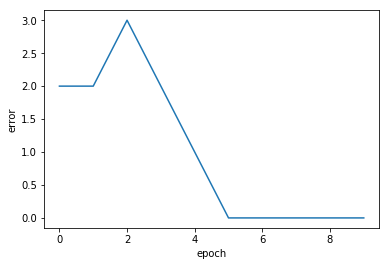

In [7]:
plt.plot(ppn.errors_)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show